In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/matzim95/ML-datasets/master/diabetes.csv')
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,positive
1,1,85,66,29,0,26.6,0.351,31,negative
2,8,183,64,0,0,23.3,0.672,32,positive
3,1,89,66,23,94,28.1,0.167,21,negative
4,0,137,40,35,168,43.1,2.288,33,positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of times pregnant      768 non-null    int64  
 1   Plasma glucose concentration  768 non-null    int64  
 2   Diastolic blood pressure      768 non-null    int64  
 3   Triceps skin fold thickness   768 non-null    int64  
 4   2-Hour serum insulin          768 non-null    int64  
 5   Body mass index               768 non-null    float64
 6   Diabetes pedigree function    768 non-null    float64
 7   Age                           768 non-null    int64  
 8   Class                         768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [4]:
y = df['Class']
X = df.drop(['Class'], axis =1)

In [5]:
X.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [7]:
y.value_counts()

negative    500
positive    268
Name: Class, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 111)

In [8]:
model = LogisticRegression(random_state=30, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=30)

In [9]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

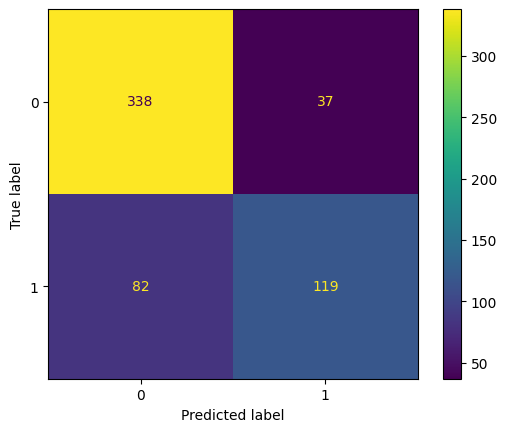

In [10]:
cm_train = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(confusion_matrix=cm_train).plot()

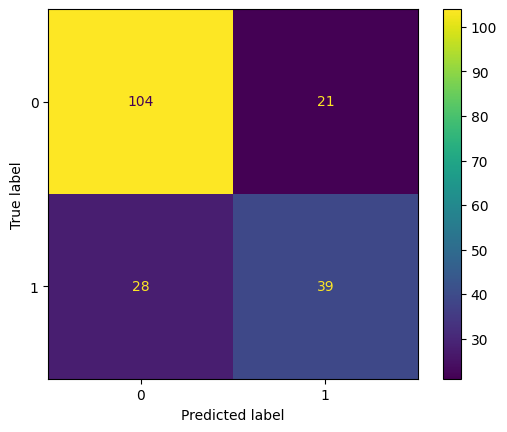

In [11]:
cm_test = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()

In [12]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, pos_label='positive')
recall_train = recall_score(y_train, y_pred_train, pos_label='positive')
f1_train = f1_score(y_train, y_pred_train, pos_label='positive')

print(f'Accuracy_train: {accuracy_train}')
print(f'Precision_train: {precision_train}')
print(f'Recall_train: {recall_train}')
print(f'F1-Score_train: {f1_train}')

Accuracy_train: 0.7934027777777778
Precision_train: 0.7628205128205128
Recall_train: 0.5920398009950248
F1-Score_train: 0.6666666666666667


In [13]:
accuracy_test = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred, pos_label='positive')
recall_test = recall_score(y_test, y_pred, pos_label='positive')
f1_test = f1_score(y_test, y_pred, pos_label='positive')

print(f'Accuracy_test: {accuracy_test}')
print(f'Precision_test: {precision_test}')
print(f'Recall_test: {recall_test}')
print(f'F1-Score_test: {f1_test}')

Accuracy_test: 0.7447916666666666
Precision_test: 0.65
Recall_test: 0.582089552238806
F1-Score_test: 0.6141732283464567


In [14]:
print(f1_score(y_test, y_pred, average="micro"))
print(f1_score(y_test, y_pred, average="macro"))
print(f1_score(y_test, y_pred, average="weighted"))
print(f1_score(y_test, y_pred, average="binary", pos_label='positive'))

0.7447916666666666
0.7117558748736175
0.7412339660120306
0.6141732283464567


In [15]:
df_dict = {'train': [accuracy_train, precision_train, recall_train, f1_train],
           'test': [accuracy_test, precision_test, recall_test, f1_test]}
df = pd.DataFrame.from_dict(df_dict, orient='index',
                            columns=['accuracy', 'precision', 'recall', 'f1'])
melted = pd.melt(df.reset_index(), id_vars='index', var_name='metric')
melted

,index,metric,value
0,train,accuracy,0.793403
1,test,accuracy,0.744792
2,train,precision,0.762821
3,test,precision,0.650000
4,train,recall,0.592040
5,test,recall,0.582090
6,train,f1,0.666667
7,test,f1,0.614173


In [16]:
df

,accuracy,precision,recall,f1
train,0.793403,0.762821,0.59204,0.666667
test,0.744792,0.650000,0.58209,0.614173


<Axes: xlabel='metric', ylabel='value'>

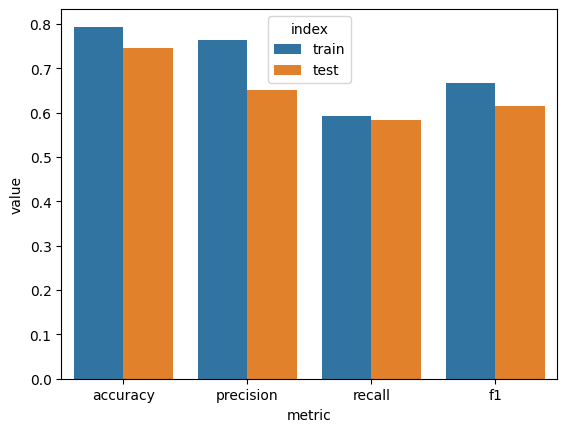

In [17]:
sns.barplot(x='metric', y='value', hue='index', data=melted)

### No regularization, no stratify

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111)

In [19]:
model = LogisticRegression(random_state=30, penalty=None, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

coefs = pd.DataFrame.from_dict({'feature': X_train.columns, 'coefs': model.coef_[0]})
coefs

,feature,coefs
0,Number of times pregnant,0.112788
1,Plasma glucose concentration,0.039172
2,Diastolic blood pressure,-0.014766
3,Triceps skin fold thickness,-0.001196
4,2-Hour serum insulin,-0.001196
5,Body mass index,0.083416
6,Diabetes pedigree function,1.126431
7,Age,0.018415


In [20]:
coefs.coefs.abs().sum()

1.397379820195073

In [21]:
f1_score_train = f1_score(y_train, model.predict(X_train), pos_label='positive')
f1_score_test = f1_score(y_test, y_pred, pos_label='positive')
print('train f1: ', round(f1_score_train, 2), 'test f1: ', round(f1_score_test, 2))

train f1:  0.65 test f1:  0.66


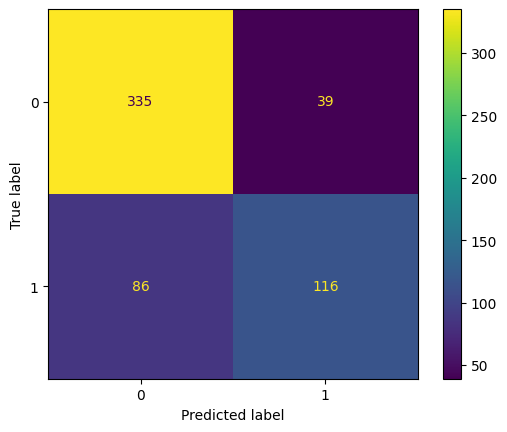

In [22]:
cm_train = confusion_matrix(y_train,y_pred_train)
ConfusionMatrixDisplay(confusion_matrix=cm_train).plot()

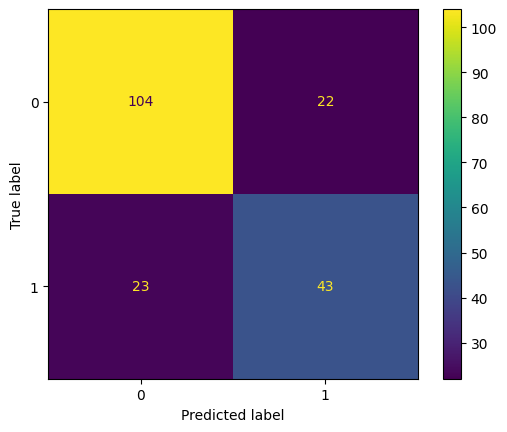

In [23]:
cm_test = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()

### No regularization with stratify

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 111)

In [26]:
model = LogisticRegression(random_state=30, penalty=None, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

coefs = pd.DataFrame.from_dict({'feature': X_train.columns, 'coefs': model.coef_[0]})
coefs

,feature,coefs
0,Number of times pregnant,0.135511
1,Plasma glucose concentration,0.035660
2,Diastolic blood pressure,-0.013649
3,Triceps skin fold thickness,-0.001659
4,2-Hour serum insulin,-0.000981
5,Body mass index,0.103697
6,Diabetes pedigree function,1.190546
7,Age,0.013660


In [27]:
f1_score_train = f1_score(y_train, model.predict(X_train), pos_label='positive')
f1_score_test = f1_score(y_test, y_pred, pos_label='positive')
print('train f1: ', round(f1_score_train, 2), 'test f1: ', round(f1_score_test, 2))

train f1:  0.67 test f1:  0.62


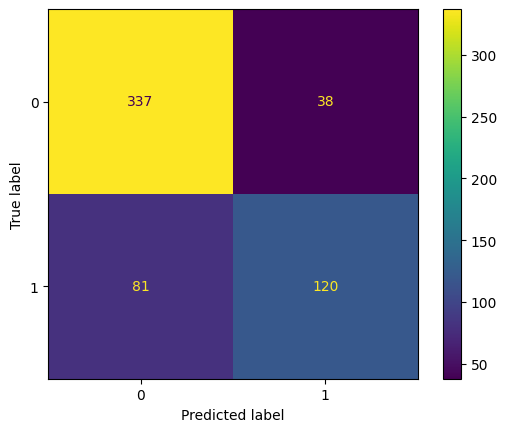

In [28]:
cm_train = confusion_matrix(y_train,y_pred_train)
ConfusionMatrixDisplay(confusion_matrix=cm_train).plot()

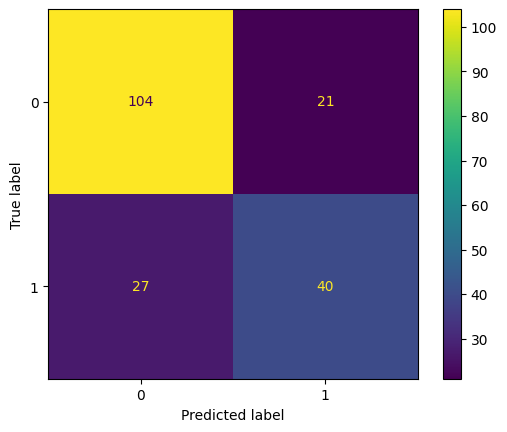

In [29]:
cm_test = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()

### Regularization L2

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 111)

In [32]:
model = LogisticRegression(random_state=30, penalty='l2', max_iter = 1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

coefs = pd.DataFrame.from_dict({'feature': X_train.columns, 'coefs': model.coef_[0]})
coefs

,feature,coefs
0,Number of times pregnant,0.134282
1,Plasma glucose concentration,0.035490
2,Diastolic blood pressure,-0.013721
3,Triceps skin fold thickness,-0.001198
4,2-Hour serum insulin,-0.000945
5,Body mass index,0.103218
6,Diabetes pedigree function,1.056027
7,Age,0.013884


In [33]:
coefs.coefs.abs().sum()

1.3587648269776815

In [34]:
f1_score_train = f1_score(y_train, model.predict(X_train), pos_label='positive')
f1_score_test = f1_score(y_test, y_pred, pos_label='positive')
print('train f1: ', round(f1_score_train, 2), 'test f1: ', round(f1_score_test, 2))

train f1:  0.67 test f1:  0.61


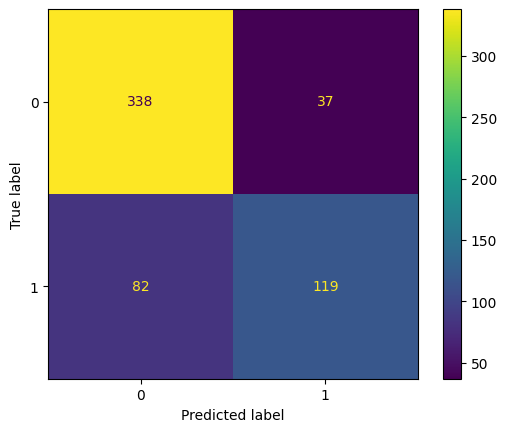

In [35]:
cm_train = confusion_matrix(y_train,y_pred_train)
ConfusionMatrixDisplay(confusion_matrix=cm_train).plot()

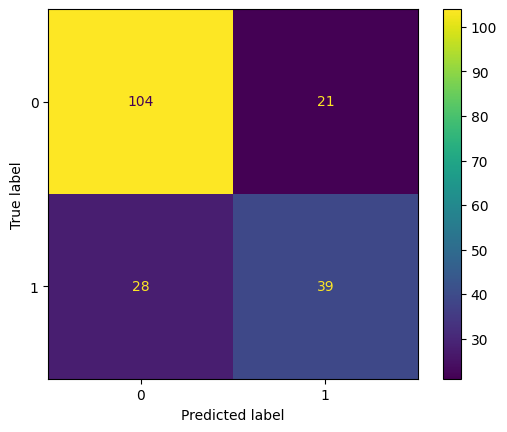

In [36]:
cm_test = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()

### Regularization L1

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111)

In [38]:
model = LogisticRegression(random_state=30, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

coefs = pd.DataFrame.from_dict({'feature': X_train.columns, 'coefs': model.coef_[0]})
coefs

,feature,coefs
0,Number of times pregnant,0.108540
1,Plasma glucose concentration,0.036995
2,Diastolic blood pressure,-0.015425
3,Triceps skin fold thickness,-0.000769
4,2-Hour serum insulin,-0.001022
5,Body mass index,0.075113
6,Diabetes pedigree function,0.916540
7,Age,0.016607


In [39]:
coefs.coefs.abs().sum()

1.1710109422682717

In [40]:
f1_score_train = f1_score(y_train, model.predict(X_train), pos_label='positive')
f1_score_test = f1_score(y_test, y_pred, pos_label='positive')
print('train f1: ', round(f1_score_train, 2), 'test f1: ', round(f1_score_test, 2))

train f1:  0.64 test f1:  0.65


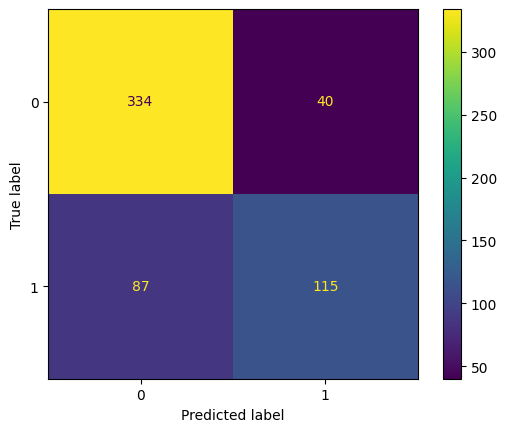

In [41]:
cm_train = confusion_matrix(y_train,y_pred_train)
ConfusionMatrixDisplay(confusion_matrix=cm_train).plot()

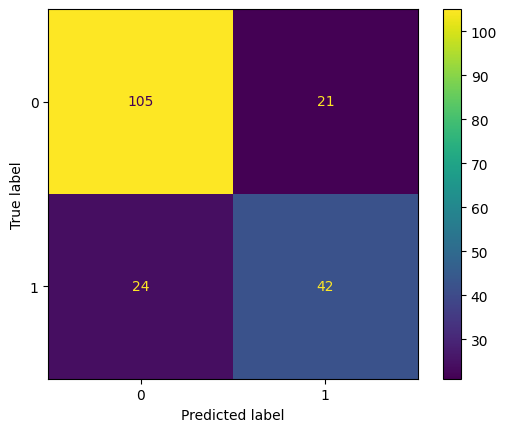

In [42]:
cm_test = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()

### Scaling

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111)

In [44]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
model = LogisticRegression(random_state=30, penalty='l1', solver='liblinear')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

coefs = pd.DataFrame.from_dict({'feature': X_train.columns, 'coefs': model.coef_[0]})
coefs

,feature,coefs
0,Number of times pregnant,1.511557
1,Plasma glucose concentration,6.532077
2,Diastolic blood pressure,-1.114538
3,Triceps skin fold thickness,0.000000
4,2-Hour serum insulin,-0.113592
5,Body mass index,3.626620
6,Diabetes pedigree function,1.679877
7,Age,0.921101


In [46]:
f1_score_train = f1_score(y_train, model.predict(X_train), pos_label='positive')
f1_score_test = f1_score(y_test, y_pred, pos_label='positive')
print('train f1: ', round(f1_score_train, 2), 'test f1: ', round(f1_score_test, 2))

train f1:  0.52 test f1:  0.61


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


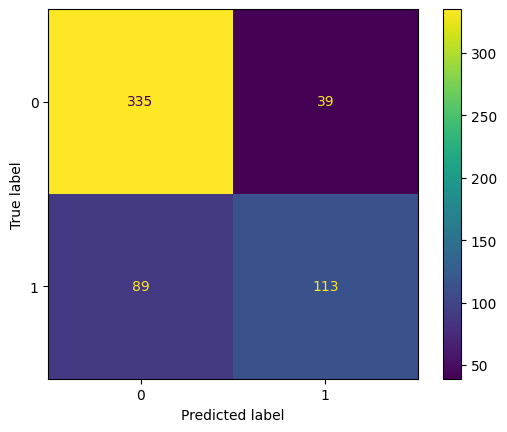

In [47]:
cm_train = confusion_matrix(y_train,y_pred_train)
ConfusionMatrixDisplay(confusion_matrix=cm_train).plot()

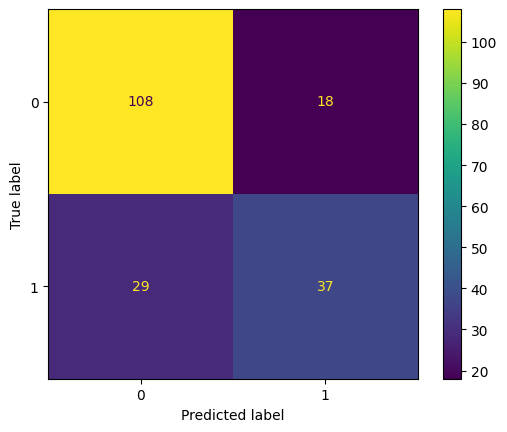

In [48]:
cm_test = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm_test).plot()

### GridSearch

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111)

In [50]:
param_to_find_from = {
    'C': np.linspace(0.1,100,50),
    'penalty': ['l1', 'l2']
}
lr_model = LogisticRegression(max_iter=10000, solver='saga')
gs = GridSearchCV(lr_model, param_to_find_from, verbose = 1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=10000, solver='saga'),
             param_grid={'C': array([  0.1       ,   2.13877551,   4.17755102,   6.21632653,
         8.25510204,  10.29387755,  12.33265306,  14.37142857,
        16.41020408,  18.44897959,  20.4877551 ,  22.52653061,
        24.56530612,  26.60408163,  28.64285714,  30.68163265,
        32.72040816,  34.75918367,  36.79795918,  38.83673469,
        40.8755102 ,  42.91428571,  44.95306122,  46.99183673,
        49.03061224,  51.06938776,  53.10816327,  55.14693878,
        57.18571429,  59.2244898 ,  61.26326531,  63.30204082,
        65.34081633,  67.37959184,  69.41836735,  71.45714286,
        73.49591837,  75.53469388,  77.57346939,  79.6122449 ,
        81.65102041,  83.68979592,  85.72857143,  87.76734694,
        89.80612245,  91.84489796,  93.88367347,  95.92244898,
        97.96122449, 100.        ]),
                         'penalty': ['l1', 'l2']})

In [51]:
print('best_params_lr ',gs.best_params_)
print('best_score_lr ', gs.best_score_)

best_params_lr  {'C': 2.138775510204082, 'penalty': 'l2'}
best_score_lr  0.7099850074962518


In [52]:
lr_final_model = LogisticRegression(**gs.best_params_, max_iter= 10000, solver='saga')
lr_final_model.fit(X_train, y_train)
y_pred = lr_final_model.predict(X_test)
y_pred_train = lr_final_model.predict(X_train)

In [53]:
f1_score_train = f1_score(y_train, lr_final_model.predict(X_train), pos_label='positive')
f1_score_test = f1_score(y_test, y_pred, pos_label='positive')
print('train f1: ', round(f1_score_train, 2), 'test f1: ', round(f1_score_test, 2))

train f1:  0.49 test f1:  0.45


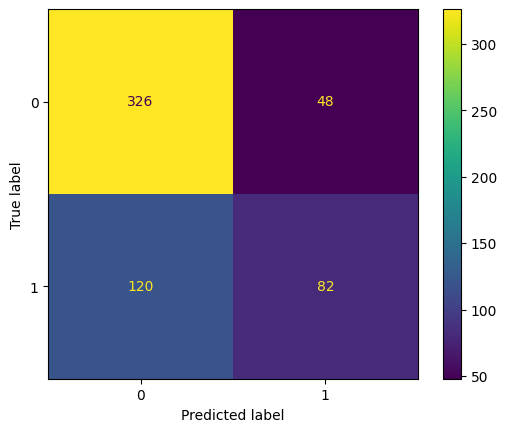

In [54]:
cm_train_lr = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(confusion_matrix = cm_train_lr, display_labels=[0,1]).plot()

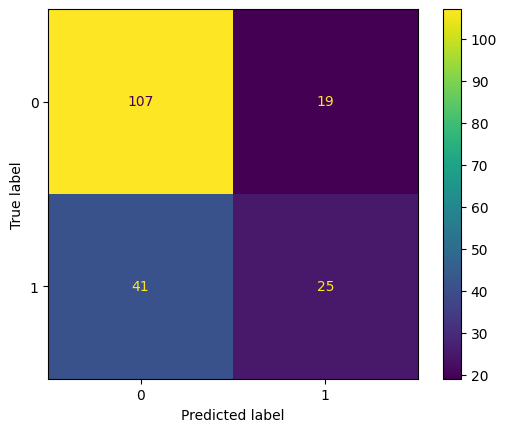

In [55]:
cm_test_lr = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm_test_lr, display_labels=[0,1]).plot()

### ROC curve

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111)

In [57]:
model = LogisticRegression(random_state=30, penalty='l2', max_iter = 1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=30)

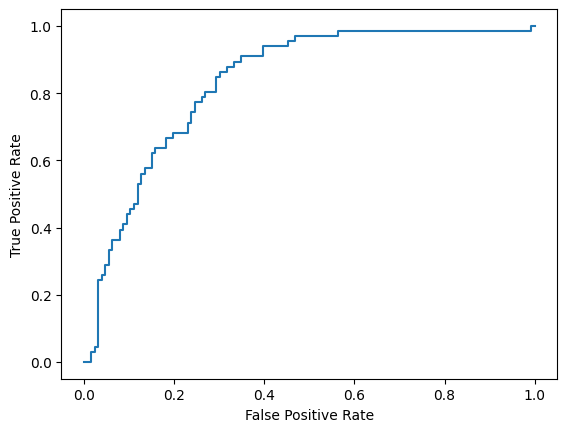

In [58]:
fpr, tpr, _ = roc_curve(np.array(y_test), model.predict_proba(X_test)[:, 1], pos_label='positive')
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### NaiveBias

In [103]:
# Gausian Bias

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 111)

In [105]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [106]:
f1_score_train = f1_score(y_train, model.predict(X_train), pos_label='positive')
f1_score_test = f1_score(y_test, y_pred, pos_label='positive')
print('train f1: ', round(f1_score_train, 2), 'test f1: ', round(f1_score_test, 2))

train f1:  0.65 test f1:  0.62


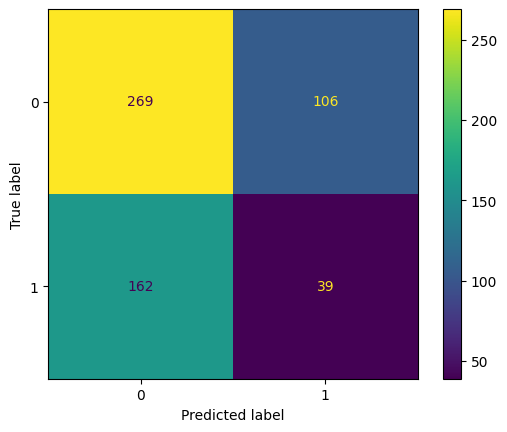

In [107]:
cm_train_gnb = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(confusion_matrix = cm_train_gnb, display_labels=[0,1]).plot()

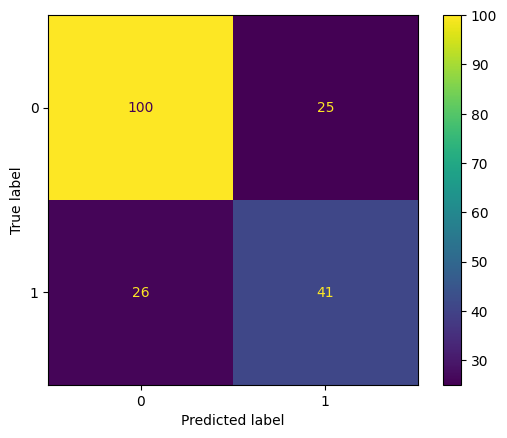

In [108]:
cm_test_gnb = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm_test_gnb, display_labels=[0,1]).plot()

In [109]:
# Multinomial Bias

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 111)

In [111]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [112]:
f1_score_train = f1_score(y_train, model.predict(X_train), pos_label='positive')
f1_score_test = f1_score(y_test, y_pred, pos_label='positive')
print('train f1: ', round(f1_score_train, 2), 'test f1: ', round(f1_score_test, 2))

train f1:  0.43 test f1:  0.43


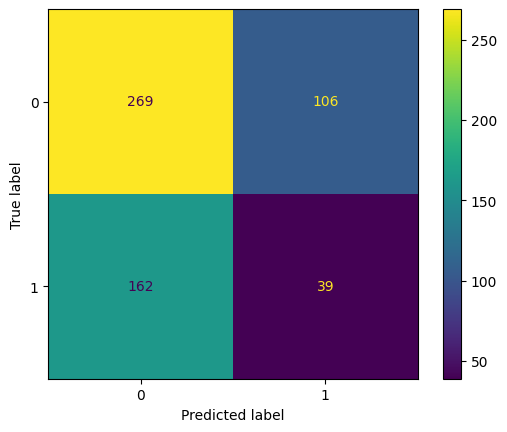

In [113]:
cm_train_mnb = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(confusion_matrix = cm_train_mnb, display_labels=[0,1]).plot()

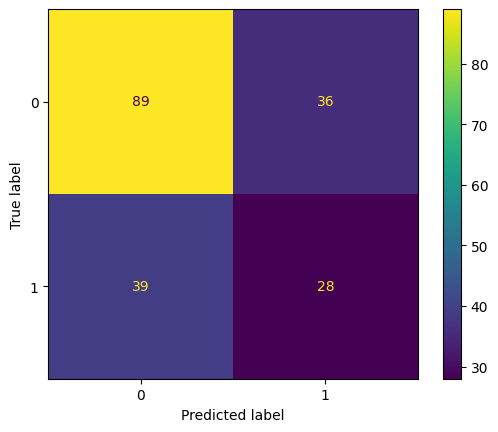

In [114]:
cm_test_mnb = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm_test_mnb, display_labels=[0,1]).plot()

### KNN classifier

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111)

In [116]:
param_to_find = {
    'n_neighbors': list(range(1,100))
}
knn = KNeighborsClassifier()
gs = GridSearchCV(knn, param_to_find, verbose = 1)
gs.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [117]:
print('best_params_knn ',gs.best_params_)
print('best_score_knn ', gs.best_score_)

best_params_knn  {'n_neighbors': 16}
best_score_knn  0.7604497751124437


In [118]:
knn_model = KNeighborsClassifier(**gs.best_params_)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
y_pred_train = knn_model.predict(X_train)

In [119]:
f1_score_train = f1_score(y_train, knn_model.predict(X_train), pos_label='positive')
f1_score_test = f1_score(y_test, y_pred, pos_label='positive')
print('train f1: ', round(f1_score_train, 2), 'test f1: ', round(f1_score_test, 2))

train f1:  0.66 test f1:  0.58


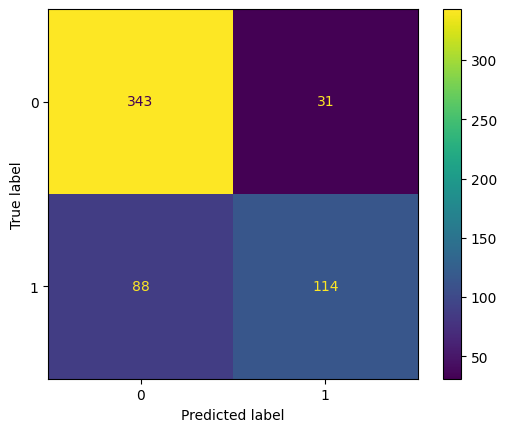

In [120]:
cm_train_knn = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(confusion_matrix = cm_train_knn, display_labels=[0,1]).plot()

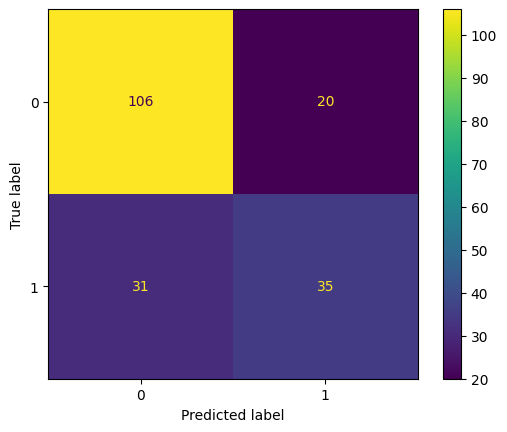

In [121]:
cm_test_knn = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm_test_knn, display_labels=[0,1]).plot()

### SVM classifier

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111)

In [7]:
param_to_find = {
    'C': np.linspace(0.1, 100, 4),
    'gamma': np.linspace(0.0001, 1, 4),
    'kernel': ['rbf', 'linear']
}
svm = SVC()
gs = GridSearchCV(svm, param_to_find,verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': array([  0.1,  33.4,  66.7, 100. ]),
                         'gamma': array([1.000e-04, 3.334e-01, 6.667e-01, 1.000e+00]),
                         'kernel': ['rbf', 'linear']},
             verbose=1)

In [8]:
print('best_params_svm ',gs.best_params_)
print('best_score_svm ', gs.best_score_)

best_params_svm  {'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}
best_score_svm  0.7778860569715143


In [9]:
svm_model = SVC(**gs.best_params_)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
y_pred_train = svm_model.predict(X_train)

In [10]:
f1_score_train = f1_score(y_train, svm_model.predict(X_train), pos_label='positive')
f1_score_test = f1_score(y_test, y_pred, pos_label='positive')
print('train f1: ', round(f1_score_train, 2), 'test f1: ', round(f1_score_test, 2))

train f1:  0.64 test f1:  0.61


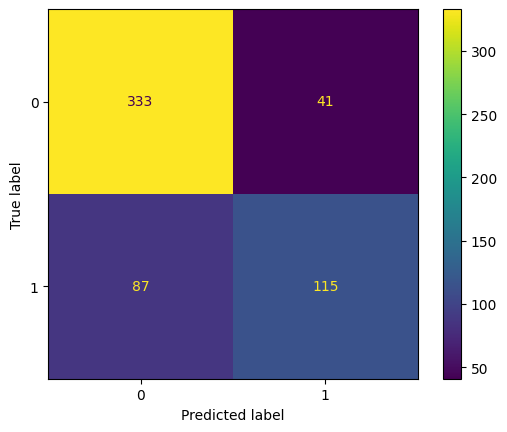

In [11]:
cm_train_svm = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(confusion_matrix = cm_train_svm, display_labels=[0,1]).plot()

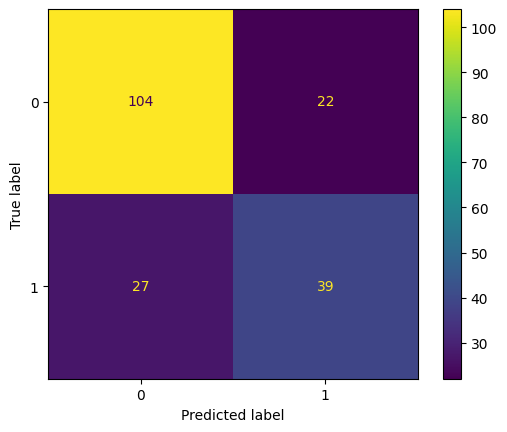

In [12]:
cm_test_svm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm_test_svm, display_labels=[0,1]).plot()